In [1]:
import numpy as np
from galpy import potential,df
from galpy.orbit import Orbit
from astropy import units as u

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3D
from halotools.empirical_models import NFWPhaseSpace
from astropy.cosmology import FLRW

path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(path)

# Scripts
from AxionStreams import plot as pl
from AxionStreams import orbit as orb

# Set units

kpc = u.kpc
kms = u.km/u.s
deg = u.deg
Gyr = u.Gyr



NameError: name 'os' is not defined

In [3]:

# def orbit_sampling(N_samples):
#     pot  = potential.NFWPotential(a=19.4,vo=220.0*kms,ro=8.0*kpc)
#     #pot  = potential.NFWPotential()
#     distr_funct = df.isotropicNFWdf(pot=pot,rmax=200*kpc,vo=1.0*kms,ro=1.0*kpc)
#     samples = distr_funct.sample(n=N_samples,return_orbit=True)
#     return samples 
def orbit_sampling(N_samples):
    pot  = potential.NFWPotential(a=19.0*kpc)
    distr_funct = df.isotropicNFWdf(pot=pot,ro=8.0*kpc,vo=220*kms)
    samples = distr_funct.sample(n=N_samples,return_orbit=True)
    return samples

samples  = orbit_sampling(100)
plot_samples(samples,azim=90,lim=1000,size_x=6,size_y=6)

NameError: name 'plot_samples' is not defined

In [ ]:
samples  = orbit_sampling(N_samples)

In [298]:
N_SAMPLES = 100

def ic_sample_halotools(n_samples,halo_mass=1e12,halo_c=10.3,savefile=None):
    nfw = NFWPhaseSpace()
    return nfw.mc_generate_nfw_phase_space_points(n_samples,halo_mass,halo_c)



In [419]:
# def orbit_sampling(N_samples):
#     pot  = potential.NFWPotential()
#     distr_funct = df.isotropicNFWdf(pot=pot,rmax=200*kpc,vo=220*kms,ro=8.0*kpc)
#     samples = distr_funct.sample(n=N_samples,return_orbit=True)
#     return samples 

def orbit_coordinates(samples,T_Gyr,nframes,ctype='Cartesian'):
    N_samples = len(samples)
    ts = np.linspace(0.0,T_Gyr*u.Gyr,nframes)
    Coords = np.zeros(shape=(nframes,samples.dim(),N_samples))

    for i in range(N_samples):
        R   = samples[i].R()
        z   = samples[i].z()
        vR  = samples[i].vR()
        vT  = samples[i].vT()
        vz  = samples[i].vz()
        phi = samples[i].phi()*180/np.pi
        o = Orbit(vxvv=[R*kpc,vR*kms,vT*kms,z*kpc,vz*kms,phi*deg])
        o.integrate(ts,potential.MWPotential2014)
        if ctype == 'Cartesian':
            Coords[:,:,i] = np.column_stack((o.x(ts),o.y(ts),o.z(ts)))
        elif ctype == 'Cylindrical':
            Coords[:,:,i] = np.column_stack((o.R(ts),o.phi(ts),o.z(ts)))
        else:
            print("Type not valid!")
    return Coords

In [9]:
N_samples = 100
nframes   = 1000
T_Gyr     = 10
dt        = T_Gyr/nframes

In [13]:
samples  = orbit_sampling(N_samples)
samples.R()

array([ 54.97273562, 171.7121867 ,  67.61550757,  10.11056491,
        34.99524861, 131.0568288 ,   7.13117765,  38.26100853,
        57.58199941,  67.67767539,  14.43962887,  61.48651453,
        29.16213594,  49.46272256,   6.87818063,  93.9305405 ,
        75.07456022,  79.97096213,  68.95546829,  93.00925612,
        29.63553401,   9.35803433,  42.70899829, 164.66040309,
        11.72923229,  31.85342337,   7.51105086,  29.26227226,
       101.29792768, 101.36965893, 119.91208024,  76.23832343,
        22.28594221,  24.03448745,  35.14467978,  39.99755465,
        43.37329442,  88.34960732,  46.50975959, 121.98873081,
       114.64049764,  18.54014408, 106.61106911,  48.41774539,
       125.22412197,  99.32966414,  17.19914051,   2.36660334,
        14.63214293, 115.01975441,  96.10934258, 174.9780574 ,
        30.97801304,  29.05010489, 195.83318374,  53.02043295,
        46.36208168, 100.22170579,  91.85118788,  41.05068582,
       117.67392844,  90.48326208,  11.01984459,  79.05

In [425]:
Coords   = orbit_coordinates(samples,T_Gyr,nframes,ctype='Cartesian')

In [12]:
def orbit_sampling(N_samples):
    pot  = potential.NFWPotential(a=19.4*kpc)
    distr_funct = df.isotropicNFWdf(pot=pot,rmax=200*kpc,vo=230*kms,ro=8.2*kpc)
    samples = distr_funct.sample(n=N_samples,return_orbit=True)
    return samples 

In [17]:
plot_samples(samples,azim=90,lim=150,size_x=6,size_y=6)
#plot_single_orbit(Coords,0,azim=10,lim=50,size_x=6,size_y=6)

TypeError: only dimensionless scalar quantities can be converted to Python scalars

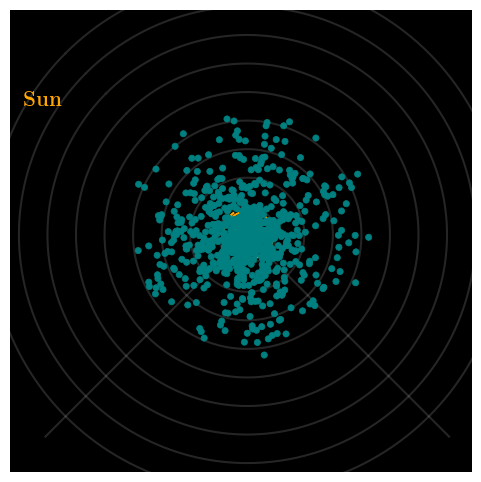

In [307]:
ic = ic_sample_halotools(1000)
ics = np.column_stack((np.array(1e6*ic['x']),np.array(1e6*ic['y']),np.array(1e6*ic['z'])))

lim  = 50;azim = 90
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
pl.plot_settings(ax,lim,lim,lim)
#if mygrid == True:
ax.grid(False)
MyGrid(ax)

plot_Sun(ax,label=True)
col = 'teal'
ax.view_init(azim, 130)

ax.scatter(ics[:,0],ics[:,1],ics[:,2],'-',alpha=1,lw=0.5,c=col)
plt.show()

In [16]:
def plot_samples(sam,azim=0,save=False,mygrid=True,sun=True,disk=True,lim=10,size_x=10,size_y=10):
    fig = plt.figure(figsize=(size_x,size_y))
    ax = plt.axes(projection='3d')
    pl.plot_settings(ax,lim,lim,lim)
    if mygrid == True:
        ax.grid(False)
        MyGrid(ax)

    plot_Sun(ax,label=True)
    col = 'teal'
    ax.view_init(azim, 130)
    
    ax.scatter(sam.x(),sam.y(),sam.z(),'-',alpha=1,lw=0.5,c=col)
    plt.show()
    
def plot_samples_halotools(sam,azim=0,save=False,mygrid=True,sun=True,disk=True,lim=10,size_x=10,size_y=10):
    fig = plt.figure(figsize=(size_x,size_y))
    ax = plt.axes(projection='3d')
    pl.plot_settings(ax,lim,lim,lim)
    if mygrid == True:
        ax.grid(False)
        MyGrid(ax)

    plot_Sun(ax,label=True)
    col = 'teal'
    ax.view_init(azim, 130)
    
    ax.scatter(sam[:,0],sam[:,1],sam[:,2],'-',alpha=1,lw=0.5,c=col)
    plt.show()

In [186]:
def MyGrid(ax):
    ax.set_axis_off()
    ax.set_facecolor('black')
    xline = np.array([(0,0,0),(-100,0,0)])
    yline = np.array([(0,0,0),(0,100,0)])
    zline = np.array([(0,0,0),(0,0,100)])
    xline = Line3D(xline[:,0], xline[:,1],xline[:,2],color='w',alpha=0.15)
    yline = Line3D(yline[:,0], yline[:,1],yline[:,2],color='w',alpha=0.15)
    zline = Line3D(zline[:,0], zline[:,1],zline[:,2],color='w',alpha=0.15)
    ax.add_line(xline)
    ax.add_line(yline)
    ax.add_line(zline)
    theta = np.linspace(0, 2 * np.pi, 201)
    for i in range(0,100,10):
        x = i*kpc*np.cos(theta)
        y = i*kpc*np.sin(theta)
        ax.plot(x,y,0,c='w',alpha=0.15)
    
    

def plot_Sun(ax,label=False):
    Sun = np.array([8.122,0.0,0.005])
    o_sun1 = Orbit(vxvv=[Sun[0]*kpc,0.0*kms,232.0*kms,0.0*kpc,0.0*kms,0.0*deg]).flip()
    ts = np.linspace(0.0,250.0*u.Myr,200)
    o_sun1.integrate(ts,potential.MWPotential2014)
    Orb0 = np.column_stack((o_sun1.x(ts),o_sun1.y(ts),o_sun1.z(ts)))
    ax.plot(Orb0[:,0],Orb0[:,1],Orb0[:,2],'orange')
    if label == True:
        plt.gcf().text(0.15, 0.72,r'{\bf Sun}',fontsize=15,color='orange')
    #plt.show()

def plot_single_orbit(orbit,frame,azim=0,save=False,sun=True,disk=True,points=False,lim=10,size_x=10,size_y=10):
    fig = plt.figure(figsize=(size_x,size_y))
    ax = plt.axes(projection='3d')
    ax.set_xlim3d([-lim,lim])
    ax.set_ylim3d([-lim,lim])
    ax.set_zlim3d([-lim,lim])
    ax.set_xlabel('Galactic $X$ [kpc]',fontsize=20,labelpad=30)
    ax.set_ylabel('Galactic $Y$ [kpc]',fontsize=20,labelpad=30)
    ax.set_zlabel('Galactic $Z$ [kpc]',fontsize=20,labelpad=30)
    ax.tick_params(which='major',direction='in',width=3,length=10,right=True,top=True,pad=10,labelsize=20)
    ax.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis.pane.set_edgecolor('black')
    ax.yaxis.pane.set_edgecolor('black')
    ax.zaxis.pane.set_edgecolor('black')
    ax.xaxis._axinfo['tick']['inward_factor'] = 0
    ax.xaxis._axinfo['tick']['outward_factor'] = 0
    ax.yaxis._axinfo['tick']['inward_factor'] = 0
    ax.yaxis._axinfo['tick']['outward_factor'] = 0
    ax.zaxis._axinfo['tick']['inward_factor'] = 0
    ax.zaxis._axinfo['tick']['outward_factor'] = 0
    ax.zaxis._axinfo['tick']['outward_factor'] = 0
    #ax.grid(linestyle='--', linewidth=0.5)
    ax.grid(False)
    mygrid(ax)
    ax.set_axis_off()
    ax.set_facecolor('black')
    time = dt*frame
    plt.gcf().text(0.15, 0.85,r'$t=%.2f~{\rm Gyr}$'%time,fontsize=15,color='w')
    plt.gcf().text(0.15, 0.75,r'${\bf Orbits}$',fontsize=15,color='teal')
    
    
    xline = np.array([(0,0,0),(-100,0,0)])
    yline = np.array([(0,0,0),(0,100,0)])
    zline = np.array([(0,0,0),(0,0,100)])
    
    xline = Line3D(xline[:,0], xline[:,1],xline[:,2],color='w',alpha=0.15)
    yline = Line3D(yline[:,0], yline[:,1],yline[:,2],color='w',alpha=0.15)
    zline = Line3D(zline[:,0], zline[:,1],zline[:,2],color='w',alpha=0.15)
    ax.add_line(xline)
    ax.add_line(yline)
    ax.add_line(zline)
    #ax.set_zlim3d(0, 1)
    plot_Sun(ax,label=True)
    col = 'teal'
    ax.view_init(azim, 130)
    #ax.plot(orbit[:,0],orbit[:,1],orbit[:,2],'-',alpha=1,c=col)
    #disr_frame = 200
    #if frame <= disr_frame:
        #ax.scatter(orbit[frame,0],orbit[frame,1],orbit[frame,2],marker='o',c=col)
    # elif frame == disr_frame+1:
    #     ax.scatter(orbit[frame,0],orbit[frame,1],orbit[frame,2],marker='o',c=col)
    #     ax.plot(orbit[disr_frame:frame,0],orbit[disr_frame:frame,1],orbit[disr_frame:frame,2],'-',alpha=1,lw=2,c=col)
    #else:
        #ax.plot(orbit[disr_frame:frame,0],orbit[disr_frame:frame,1],orbit[disr_frame:frame,2],'-',alpha=1,lw=2,c=col)
    ax.scatter(orbit[frame,0,:],orbit[frame,1,:],orbit[frame,2,:],'-',alpha=1,lw=0.5,c=col)
    #if points == True:
    #    ax.scatter(orbit[:,0],orbit[:,1],orbit[:,2],'-',alpha=0.5,c=col)
    # ax.plot(orbit[0,0],orbit[0,1],orbit[0,2],'-',marker='o',markersize=5,c=col)
    # ax.plot(orbit[-1,0],orbit[-1,1],orbit[-1,2],'-',marker='X',markersize=5,c=col)
    #ax.plot(orbit[0],orbit[0,1],orbit[0,2],'-',marker='o',markersize=5,c=col)
    #ax.plot(orbit[-1,0],orbit[-1,1],orbit[-1,2],'-',marker='X',markersize=5,c=col)
    
    if disk == True:
        theta = np.linspace(0, 2 * np.pi, 201)
        x = 30*kpc*np.cos(theta)
        y = 30*kpc*np.sin(theta)
        ax.plot(x,y,0,c='gray',ls='--',alpha=0.75)
    plt.show()
    #fig.savefig("nnnnew3D/fr_{:03d}.png".format(frame),bbox_inches='tight')
    



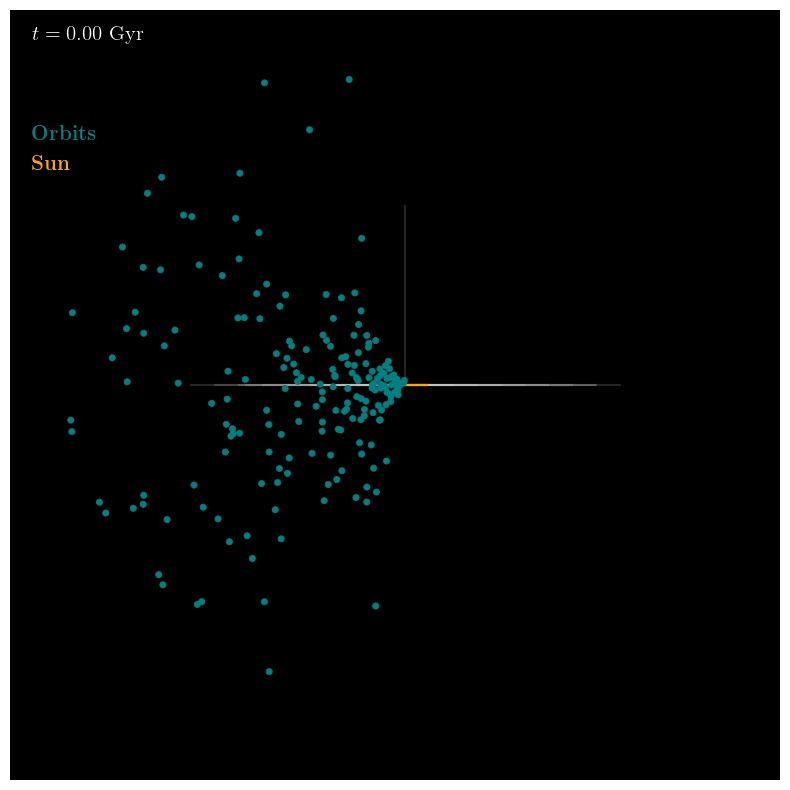

In [82]:
plot_single_orbit(Coords,0,azim=0,lim=100,disk=False)

In [19]:
for frame in range(100):
    plot_single_orbit(Coords,frame,azim=20,lim=35,disk=False)

In [46]:
for i in range(400):
    plot_single_orbit(Coords[:,:,10],i,azim=20,lim=35,disk=False)



In [25]:
#for i in range(N_samples):
plot_single_orbit(Coords[:,:,10],100,azim=20,lim=50,disk=False)
    

In [33]:
plot_single_orbit(Coords[:,:,10],,azim=20,lim=35,disk=False)

In [ ]:
# From Kavanaghs's code

# def inverse_transform_sampling(function, x_range, nbins=1000, n_samples=1000, logarithmic=False):
#     if (logarithmic):
#         bins = np.geomspace(x_range[0], x_range[-1], num=nbins)
#     else:
#         bins = np.linspace(x_range[0], x_range[-1], num=nbins)
#     pdf = function(np.delete(bins,-1) + np.diff(bins)/2)
#     Norm = np.sum(pdf*np.diff(bins))
#     pdf /= Norm
#     cumul_values = np.zeros(bins.shape)
#     cumul_values[1:] = np.cumsum(pdf*np.diff(bins))
#     inv_cdf = interp1d(cumul_values, bins)
#     r = np.random.rand(n_samples)
#     return inv_cdf(r)